In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
from random import sample, seed
from sklearn.utils import shuffle
pd.set_option('display.max_colwidth', None)

In [37]:

json_benign_samples_1 = 'json_results/benign_samples_1.json'
json_benign_samples_2 = "json_results/benign_samples_2.json"
json_benign_samples_3 = 'json_results/benign_samples_3.json'
json_benign_samples_4 = 'json_results/benign_samples_4.json'
json_benign_samples_5 = 'json_results/benign_samples_5.json'
json_benign_samples_6 = "json_results/benign_samples_6.json"
json_benign_samples_7 = 'json_results/benign_samples_7.json'
json_benign_samples_8 = 'json_results/benign_samples_8.json'
json_benign_samples_9 = 'json_results/benign_samples_9.json'
json_benign_samples_10 = 'json_results/benign_samples_10.json'
json_benign_samples_11 = 'json_results/benign_samples_11.json'
json_benign_final = "/Users/maxsueltrajano/Desktop/FYP/Malicious JavaScript Code Project/Component_2-Feature_Extraction/results/benign_samples_final.json"

json_malicious_1 = 'json_results/malicious_2015.json'
json_malicious_2 = 'json_results/malicious_2016.json'
json_malicious_3 = 'json_results/malicious_2017.json'
json_malicious_4 = "json_results/malicious_geekonSecurity.json"


def getJson(path):
    filename = os.path.join(os.getcwd(),path)
    with open(filename, 'r+') as fileobj:
        data = json.load(fileobj)
    return data



In [38]:

data_benign_1 = getJson(json_benign_samples_1)
data_benign_2 = getJson(json_benign_samples_2)
data_benign_3 = getJson(json_benign_samples_3)
data_benign_4 = getJson(json_benign_samples_4)
data_benign_5 = getJson(json_benign_samples_5)
data_benign_6 = getJson(json_benign_samples_6)
data_benign_7 = getJson(json_benign_samples_7)
data_benign_8 = getJson(json_benign_samples_8)
data_benign_9 = getJson(json_benign_samples_9)
data_benign_10 = getJson(json_benign_samples_10)
data_benign_11 = getJson(json_benign_samples_11)
data_benign_final = getJson(json_benign_final)


data_malicious_1 = getJson(json_malicious_1)
data_malicious_2 = getJson(json_malicious_2)
data_malicious_3 = getJson(json_malicious_3)
data_malicious_4 = getJson(json_malicious_4)

In [39]:
df_benign_1 = pd.DataFrame(data_benign_1)
df_benign_2 = pd.DataFrame(data_benign_2)
df_benign_3 = pd.DataFrame(data_benign_3)
df_benign_4 = pd.DataFrame(data_benign_4)
df_benign_5 = pd.DataFrame(data_benign_5)
df_benign_6 = pd.DataFrame(data_benign_6)
df_benign_7 = pd.DataFrame(data_benign_7)
df_benign_8 = pd.DataFrame(data_benign_8)
df_benign_9 = pd.DataFrame(data_benign_9)
df_benign_10 = pd.DataFrame(data_benign_10)
df_benign_11 = pd.DataFrame(data_benign_11)
df_benign_final = pd.DataFrame(data_benign_final)

df_malicious_1 = pd.DataFrame(data_malicious_1)
df_malicious_2 = pd.DataFrame(data_malicious_2)
df_malicious_3 = pd.DataFrame(data_malicious_3)
df_malicious_4 = pd.DataFrame(data_malicious_4)

In [40]:
df_benign_1['Class'] = 0
df_benign_2['Class'] = 0
df_benign_3['Class'] = 0
df_benign_4['Class'] = 0
df_benign_5['Class'] = 0
df_benign_6['Class'] = 0
df_benign_7['Class'] = 0
df_benign_8['Class'] = 0
df_benign_9['Class'] = 0
df_benign_10['Class'] = 0
df_benign_11['Class'] = 0
df_benign_final["Class"] = 0

df_malicious_1['Class'] = 1
df_malicious_3['Class'] = 1
df_malicious_2['Class'] = 1
df_malicious_4['Class'] = 1

In [41]:
df_benign = pd.concat([
    df_benign_1, df_benign_2, 
    df_benign_3, df_benign_4,
    df_benign_5, df_benign_6, 
    df_benign_7, df_benign_8, 
    df_benign_9, df_benign_10,
    df_benign_11, df_benign_final
    
    
])

In [42]:
print(f'Duplicates benign: {df_benign.duplicated().sum()}')
df_benign.drop_duplicates(keep='first', inplace=True)
print(f'Duplicates benign: {df_benign.duplicated().sum()}')

Duplicates benign: 43268
Duplicates benign: 0


In [43]:
# seed(1)
# data_benign_sample = df_benign.sample(7431, random_state=0)

In [44]:
df_malicious = pd.concat([df_malicious_1, df_malicious_2, df_malicious_3, df_malicious_4])

In [45]:
print(f'Duplicates malicious: {df_malicious.duplicated().sum()}')
df_malicious.drop_duplicates(keep='first', inplace=True)
print(f'Duplicates malicious: {df_malicious.duplicated().sum()}')

Duplicates malicious: 9219
Duplicates malicious: 0


In [46]:
print(f'Benign shape: {df_benign.shape}')
print(f'Malicious shape: {df_malicious.shape}')

Benign shape: (58629, 45)
Malicious shape: (24113, 37)


In [47]:
# df_benign.describe()

In [48]:
# concatenating
df = pd.concat([df_benign, df_malicious])
df = shuffle(df, random_state=0)

In [49]:
drop_cols = [
    "BinaryExpression", "ClassDeclaration", "Identifier", "VariableDeclaration",
   "SpreadElement", "TemplateLiteral", 
    "VariableDeclaration", "MetaProperty", "Imports", "Exports",
    "ImportExpression"]

df.drop(columns=drop_cols, axis=1, inplace=True)

In [50]:
df[df.columns] = df[df.columns].fillna(0).astype('int')

In [51]:
# Problem 1 : Discrepancy in length

In [52]:
df[(df["file_length"]) & (df["Class"] == 0)]["file_length"].describe()

count    2.916000e+04
mean     8.994485e+04
std      3.591299e+05
min      1.000000e+00
25%      3.283000e+03
50%      1.212200e+04
75%      5.252750e+04
max      1.424578e+07
Name: file_length, dtype: float64

In [53]:
df[(df["file_length"]) & (df["Class"] == 1)]["file_length"].describe()

count     12102.000000
mean      73858.567179
std      128326.497080
min         377.000000
25%       12649.000000
50%       29061.000000
75%       82880.500000
max      769557.000000
Name: file_length, dtype: float64

In [54]:
df = df.drop(df[(df.file_length > 100000)].index)
total =  len(df)
df = df.drop(df[(df.file_length < 1000)].index)
total += len(df)
total

60838

In [55]:
print(f'Duplicates: {df.duplicated().sum()}')
df = df.drop_duplicates(keep='first')
print(f'Duplicates: {df.duplicated().sum()}')
print(f'Current Dataset Shape: {df.shape}')

Duplicates: 424
Duplicates: 0
Current Dataset Shape: (26030, 35)


In [56]:
file_len_benign = df[(df["file_length"]) & (df["Class"] == 0)]["file_length"]
file_len_malicious = df[(df["file_length"]) & (df["Class"] == 1)]["file_length"]

In [57]:
df['Class'] = df['Class'].apply(lambda val: 'Benign' if val == 0 else 'Malicious')

Text(0.5, 1.0, 'File Length')

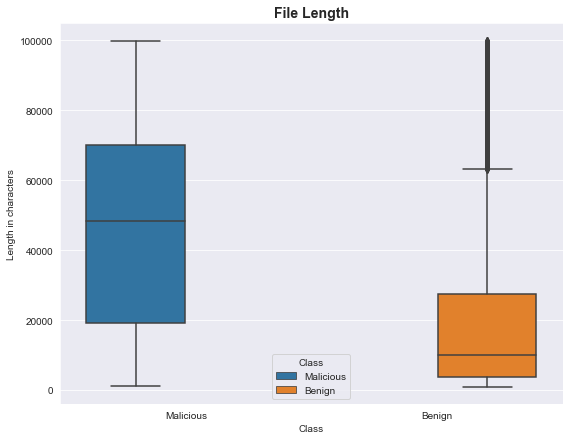

In [58]:
table1 = df[["file_length", "Class"]]
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.boxplot(x='Class', y='file_length', hue='Class', data=table1)
ax.set(xlabel='Class', ylabel='Length in characters');
ax.set_title('File Length', fontsize=14, fontweight='bold')
# ax.set(ylim = (0, 50));
# plt.savefig("images/File_length", dpi=300)

In [25]:
df.insert(len(df.columns) - 1, 'Class', df.pop('Class'))

In [26]:
df["eval"] = df["eval"].apply(lambda x: 1 if x >= 1 else 0)
withEval, withOutEval= df["eval"].value_counts().to_list()[0], df["eval"].value_counts().to_list()[1] 

In [27]:
# n_eval_benign = (n_eval_benign / len(df[df["Class"] == "Benign"])) * 100


In [28]:
n_eval_benign =  df[(df["eval"]) & (df["Class"] == "Benign")]["eval"].sum()
# n_eval_benign = (n_eval_benign / withEval) * 100
n_eval_benign

936

In [29]:
n_eval_malicious =  df[(df["eval"]) & (df["Class"] == "Malicious")]["eval"].sum()
# n_eval_malicious = (n_eval_malicious/ withEval) * 100
print((n_eval_malicious + n_eval_benign) / len(df))
n_eval_malicious + n_eval_benign

0.3650841101176726


13434

In [30]:
# labels = ["Benign", "Malicious"]
# sizes = [n_eval_benign, n_eval_malicious]
# explode = (0, 0.2)
# colors = ["#99ff99",'#ff9999' ]
# fig1, ax1 = plt.subplots(figsize=(8,6))
# plt.tight_layout()
# ax1.pie(sizes,explode =explode,
# autopct='%1.1f%%',pctdistance=0.8, colors=colors);
# plt.legend(labels=labels)

# plt.title("\nOut of 12914 scripts containing eval ");
# # plt.savefig("images/scripts_with_eval", dpi=300)

In [31]:
# # # Benign vs Malicious
# table3 = df[["funcArgsCallExpression", "concatenation",'Class']]
# fig, ax = plt.subplots(figsize=(8,6))
# ax = sns.barplot(y='funcArgsCallExpression', x='concatenation', hue='Class', data=table3)
# ax.set_title('Objects vs Binary Expressions', fontsize=14, fontweight='bold')
# ax.set(xlabel='ObjectExpressions', ylabel='BinaryExpressiont')
# ax.legend(title='Class',bbox_to_anchor=[0.6, 1]);
# # ax.set(ylim = (0, 50));
# # plt.savefig('smv_non_linear.png', dpi=300)

In [32]:
# table2 = df[['stringCount', 'concatenation', 'Class']]
# fig, ax = plt.subplots(figsize=(8,6))
# ax = sns.scatterplot(y='concatenation', x='stringCount', hue='Class', data=table2)
# ax.set_title('Objects vs Binary Expressions', fontsize=14, fontweight='bold')
# ax.set(xlabel='stringCount', ylabel='concatenation')
# ax.legend(title='Class',bbox_to_anchor=[0.6, 1]);

In [33]:
# Plotting the Scores

In [2]:
# svm 
svm_precision = [56.98, 99.66, 97.18]
svm_sensitivity = [61.01, 87.33, 85.95]
svm_specificity = [45.21, 99.70, 97.91]

In [3]:
dt_precision = [88.99,96.80, 97.70]
dt_sensitivity = [95.10, 93.34, 95.22 ]
dt_specificity = [88.09, 96.71 , 98.12]

In [4]:
rf_precision = [97.25, 99.61, 99.12]
rf_sensitivity = [98.60, 97.42,99.02 ]
rf_specificity = [97.20, 99.62,  99.27]

In [5]:
data_precision = {
    "Models" : ["SVM", "DT", "RF"],
    "Experiment 1" : [svm_precision[0], dt_precision[0], rf_precision[0]],   
    "Experiment 2" : [svm_precision[1], dt_precision[1], rf_precision[1]], 
    "Experiment 3": [svm_precision[2], dt_precision[2], rf_precision[2]], 
    
}

data_sensitivity = {
    "Models" : ["SVM", "DT", "RF"],
    "Experiment 1" : [svm_sensitivity[0],dt_sensitivity[0], rf_sensitivity[0]],
    "Experiment 2": [svm_sensitivity[1],dt_sensitivity[1], rf_sensitivity[1]],   
    "Experiment 3": [svm_sensitivity[2],dt_sensitivity[1], rf_sensitivity[2]],
    

}
    
data_specificity = {
    "Models" : ["SVM", "DT", "RF"],
    "Experiment 1" : [svm_specificity[0],dt_specificity[0], rf_specificity[0]],
    "Experiment 2": [svm_specificity[1],dt_specificity[1], rf_specificity[1]], 
    "Experiment 3": [svm_specificity[2],dt_specificity[2], rf_specificity[2]],

}

  

In [6]:
df_precision = pd.DataFrame(data_precision)
df_precision.set_index("Models", inplace=True)
df_sensitivity = pd.DataFrame(data_sensitivity)
df_sensitivity.set_index("Models", inplace=True)
df_specificity = pd.DataFrame(data_specificity)
df_specificity.set_index("Models", inplace=True)


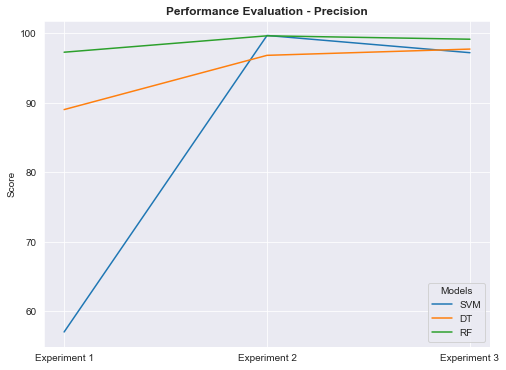

In [7]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6));
sns.lineplot(data=df_precision.loc["SVM"],
        dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_precision.loc["DT"], 
dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_precision.loc["RF"],
 dashes=False, markers=True,ax=ax)

ax.set_title('Performance Evaluation - Precision', fontsize=12, fontweight='bold');
ax.set(xlabel= "", ylabel='Score');
ax.legend(title='Models', labels=['SVM', 'DT', 'RF']);
# plt.savefig('images/models_precision.png', dpi=300)

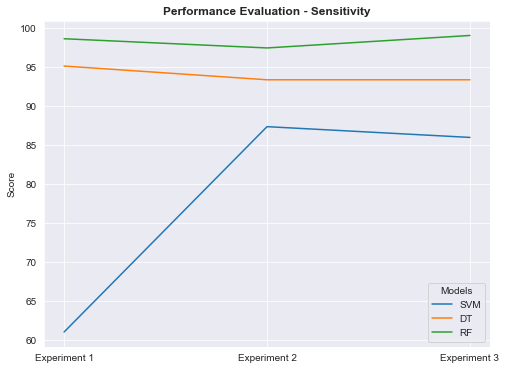

In [8]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6));
sns.lineplot(data=df_sensitivity.loc["SVM"],
        dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_sensitivity.loc["DT"], 
dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_sensitivity.loc["RF"],
 dashes=False, markers=True,ax=ax)

ax.set_title('Performance Evaluation - Sensitivity', fontsize=12, fontweight='bold');
ax.set(xlabel= "", ylabel='Score');
ax.legend(title='Models', labels=['SVM', 'DT', 'RF']);
# plt.savefig('images/models_sensitivity.png', dpi=300)

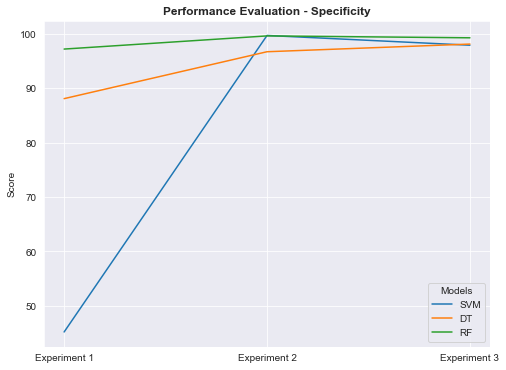

In [9]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6));
sns.lineplot(data=df_specificity.loc["SVM"],
        dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_specificity.loc["DT"], 
dashes=False, markers=True, ax=ax)

sns.lineplot(data=df_specificity.loc["RF"],
 dashes=False, markers=True,ax=ax)

ax.set_title('Performance Evaluation - Specificity', fontsize=12, fontweight='bold');
ax.set(xlabel= "", ylabel='Score');
ax.legend(title='Models', labels=['SVM', 'DT', 'RF']);
# plt.savefig('images/models_specificity.png', dpi=300)

In [10]:
# overall
data_overall = {
    "Models": ["SVM", "DT", "RF"],
    "Precision": [ 
        ( df_precision.loc["SVM"].sum()/3),
         (df_precision.loc["DT"].sum()/3),
        (df_precision.loc["RF"].sum()/3),
    ],
    "Sensitivity": [
        (df_sensitivity.loc["SVM"].sum()/3),
        (df_sensitivity.loc["DT"].sum()/3),
        (df_sensitivity.loc["RF"].sum()/3),
    ],

    "Specificity": [
        (df_specificity.loc["SVM"].sum()/3),
        (df_specificity.loc["DT"].sum()/3),
        (df_specificity.loc["RF"].sum()/3)
    ]
    
    


}

In [11]:
df_overall = pd.DataFrame(data_overall)
df_overall.set_index("Models", inplace=True)
df_overall

,Precision,Sensitivity,Specificity
Models,,,
SVM,84.606667,78.096667,80.940000
DT,94.496667,93.926667,94.306667
RF,98.660000,98.346667,98.696667


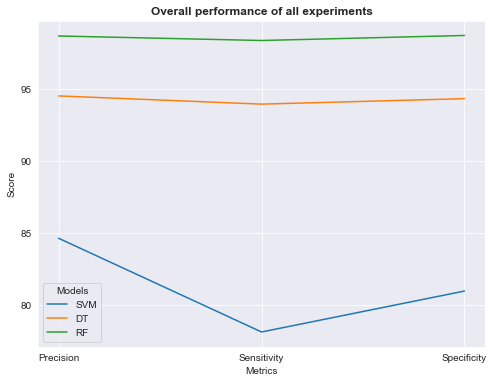

In [12]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6));
sns.lineplot(data=df_overall.loc["SVM"],
        dashes=False, ax=ax)

sns.lineplot(data=df_overall.loc["DT"],
        dashes=False, ax=ax)

sns.lineplot(data=df_overall.loc["RF"],
        dashes=False, ax=ax)
ax.set_title('Overall performance of all experiments', fontsize=12, fontweight='bold');
ax.set(xlabel= "Metrics", ylabel='Score');
ax.legend(title='Models', labels=['SVM', 'DT', 'RF']);
# plt.savefig('images/overall_performance', dpi=300)

In [2]:
# precision, sensitivity, specificity
# exp1 
svm_1 = 56.98 +  61.01  + 45.21
svm_2 = 99.66 + 87.33 + 99.70
svm_3 = 97.18 + 85.95 + 97.91

dt_1 = 88.99 + 95.10 + 88.09
dt_2 = 96.80+   93.34 + 96.71
dt_3 =  97.70 + 95.22 + 98.12

rf_1 = 97.25 +  98.60 + 97.20
rf_2 = 99.61 +  97.42 +  99.62
rf_3 = 99.12 + 99.02 + 99.27

In [8]:
svm1 = svm_1 /3
svm2 = svm_2 / 3
svm3 = svm_3 /3
svm3 - svm2

-1.88333333333334

In [10]:
dt1 = dt_1 /3
dt2 = dt_2 /3
dt3 = dt_3 /3
dt3 - dt2

1.3966666666666754

In [14]:
rf1 = rf_1 /3 
rf2 = rf_2 /3
rf3 = rf_3 /3
rf3 - rf2

0.2533333333333303

In [78]:
precision = 99.66 - 96.80
precision

2.8599999999999994

In [82]:
sensitivity = 93.34 - 87.33
sensitivity

6.010000000000005

In [79]:
specificity = 99.70 - 96.71
specificity

2.990000000000009

In [ ]:
# # # # #  Writing the DataFrame to CSV file for the classifier
# filepath = os.path.join(os.getcwd(), 'data/final_experiment.csv')
# df.to_csv(filepath, index=False)